# 105 Python intermediate - own modules
_Kamil Bartocha_

_wersja_ 0.0.1

## Dlaczego piszemy własną bibliotekę w Pythonie?

Pisanie własnej biblioteki w Pythonie ma wiele korzyści i jest praktykowane z kilku powodów:

### 1. **Ponowne Użycie Kodu**
   Biblioteka pozwala zorganizować kod w sposób, który może być używany wielokrotnie w różnych projektach. Dzięki temu nie musisz pisać tego samego kodu za każdym razem. Na przykład, jeśli napiszesz bibliotekę do obsługi plików XML i JSON, możesz jej używać w różnych projektach, zamiast kopiować kod między nimi.

### 2. **Organizacja i Utrzymanie Kodu**
   Biblioteki pomagają w lepszej organizacji kodu. Zamiast trzymać dużą ilość funkcji i klas w jednym projekcie, można je podzielić na moduły i pakiety, które łatwiej zarządzać i aktualizować. Każdy moduł może odpowiadać za inną część funkcjonalności.

### 3. **Udostępnianie Innym Użytkownikom**
   Pisząc bibliotekę, możesz ją udostępnić innym programistom. Dzięki temu mogą korzystać z Twojego rozwiązania, instalując bibliotekę za pomocą narzędzi takich jak `pip`. Możesz nawet opublikować swoją bibliotekę w PyPI (Python Package Index), co ułatwi jej instalację.

### 4. **Skalowalność i Rozszerzalność**
   Dobrze napisana biblioteka może być rozszerzana w przyszłości bez potrzeby ingerowania w projekty, które z niej korzystają. Dodawanie nowych funkcji i modułów do biblioteki nie zmienia kodu głównego projektu, co ułatwia rozwój.

### 5. **Testowanie i Standaryzacja**
   Biblioteki często zawierają zestawy testów, które pomagają w automatycznym sprawdzaniu poprawności działania kodu. Pisanie testów dla bibliotek pozwala na standaryzację i utrzymanie wysokiej jakości kodu, niezależnie od tego, w jakim projekcie jest wykorzystywany.

### 6. **Modularność**
   Biblioteka może być wykorzystywana w różnych projektach, dzięki czemu kod staje się bardziej modularny i elastyczny. Możesz tworzyć mniejsze komponenty, które łatwo łączyć ze sobą w większe systemy.

### 7. **Oszczędność Czasu**
   Raz napisana biblioteka może zaoszczędzić dużo czasu w przyszłych projektach. Zamiast pisać podobne funkcje od nowa, korzystasz z już gotowego, przetestowanego kodu, co przyspiesza pracę i redukuje błędy.


## Przykład praktyczny
Na przykład, jeśli tworzysz wiele aplikacji, które muszą przetwarzać pliki XML i JSON, napisanie biblioteki, która to robi, umożliwia łatwe i szybkie wykorzystanie tego samego kodu w każdym projekcie bez powtarzania pracy.


Aby stworzyć bibliotekę Pythona z dostarczonym kodem, należy postępować zgodnie ze standardową strukturą dla pakietu Python. Obejmuje to zorganizowanie kodu w moduły, utworzenie plików konfiguracyjnych oraz opcjonalnie dodanie testów i dokumentacji.

### Instrukcja jak stworzyć swoją bibliotekę i dla klas: `ReadXML` i `ReadJSON`.

1. Struktura projektu - katalogi, pliki
2. Implementacja klas
3. `__init__.py` - inicjacja pakietu
4. Plik `setup.py` - ustawienia instalacji
5. Plik `README.md` - dokumentacja
6. Testy jendostkowe
7. Instalacja biblioteki
8. Przykład użycia
9. Opcjonalnie, publikacja do PyPi*


### 1. Struktura Projektu
Utwórz pliki i katalogi odpowiadające poniższej strukturze:

```bash
datareader/
├── datareader/
│   ├── __init__.py
│   ├── xml_reader.py
│   ├── json_reader.py
├── tests/
│   ├── test_xml_reader.py
│   ├── test_json_reader.py
├── README.md
├── setup.py
└── LICENSE
```
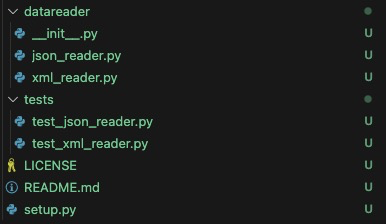


### 2. Zaimplementuj klasy `ReadXML` i `ReadJSON` w plikach `xml_reader.py` and `json_reader.py`






`datareader/xml_reader.py`:


In [ ]:
import xml.etree.ElementTree as ET

class ReadXML:
    def __init__(self, file_path):
        self.file_path = file_path
        self.tree = None
        self.root = None

    def load_xml(self):
        try:
            self.tree = ET.parse(self.file_path)
            self.root = self.tree.getroot()
            print("XML file loaded successfully.")
        except ET.ParseError as e:
            print(f"Error parsing XML file: {e}")
        except FileNotFoundError:
            print(f"File not found: {self.file_path}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    def _get_element_by_path(self, path):
        parts = path.split(".")
        current_elem = self.root

        for part in parts:
            if part.startswith("root"):
                continue
            current_elem = current_elem.find(part)
            if current_elem is None:
                return None
        return current_elem

    def get_value(self, path):
        elem = self._get_element_by_path(path)
        if elem is not None:
            return elem.text
        else:
            return "Key not found"


`datareader/json_reader.py`:


In [1]:
import json

class ReadJSON:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_json(self):
        try:
            with open(self.file_path, 'r') as file:
                self.data = json.load(file)
            print("JSON file loaded successfully.")
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON file: {e}")
        except FileNotFoundError:
            print(f"File not found: {self.file_path}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    def _get_element_by_path(self, path):
        parts = path.split(".")
        current_elem = self.data

        for part in parts:
            if '[' in part and ']' in part:
                key = part[:part.index('[')]
                index = int(part[part.index('[') + 1:part.index(']')])
                current_elem = current_elem.get(key, None)
                if current_elem is not None and isinstance(current_elem, list):
                    current_elem = current_elem[index]
                else:
                    return None
            else:
                current_elem = current_elem.get(part, None)

            if current_elem is None:
                return None
        return current_elem

    def get_value(self, path):
        elem = self._get_element_by_path(path)
        if elem is not None:
            return elem
        else:
            return "Key not found"


### 3. Stwórz plik inicjujący `__init__.py`

#### Plik __init__.py w bibliotece Python pełni kilka kluczowych funkcji:

- Inicjalizuje Pakiet: Obecność pliku `__init__.py` sprawia, że katalog jest traktowany jako pakiet Python. Dzięki temu Python wie, że ma do czynienia z modułem, który można importować.

- Kontroluje Importy: Plik `__init__.py` umożliwia kontrolowanie, które moduły i funkcje są dostępne podczas importowania pakietu. Można w nim definiować, co zostanie zaimportowane przy użyciu składni from mypackage import *.

- Składa Moduły w Pakiet: W bibliotekach wielomodułowych plik `__init__.py` umożliwia grupowanie różnych modułów, aby można je było importować w sposób zorganizowany i logiczny. Na przykład, możesz w nim importować inne moduły wewnętrzne, co pozwala uprościć korzystanie z biblioteki.

- Umożliwia Inicjalizację Pakietu: Możesz w nim umieścić kod, który będzie wykonywany przy każdym zaimportowaniu pakietu. Może to być przydatne do zainicjowania zmiennych globalnych, ustawień, czy też ładowania innych zasobów.

Dzięki temu po zaimportowaniu pakietu użytkownik może uzyskać dostęp do klas w prostszy sposób:

```python
from datareader import ReadXML, ReadJSON
```

Bez pliku `__init__.py`, katalog byłby traktowany tylko jako zwykły folder, a nie jako pakiet Python, co uniemożliwiłoby jego importowanie.

#### Utwórz plik:
`datareader/__init__.py`:

```python
from .xml_reader import ReadXML
from .json_reader import ReadJSON
```

### 4. Utwórz plik `setup.py`

Umożliwi on instalację Twojej biblioteki za pomocą `pip`.

#### Utwórz plik:
`setup.py`:

In [ ]:
from setuptools import setup, find_packages

setup(
    name="datareader",
    version="0.1.2",
    description="A library for reading and processing XML and JSON data.",
    long_description=open("README.md").read(),
    long_description_content_type="text/markdown",
    author="Kamil Bartocha",
    author_email="kamilbartocha53@gmail.com",
    url="https://github.com/kamilbartocha/mydatareader",
    packages=find_packages(),
    classifiers=[
        "Programming Language :: Python :: 3",
        "License :: OSI Approved",
        "Operating System :: OS Independent",
    ],
    python_requires='>=3.6',
)

pip install jit.team-KafkaDriver
pip install KafkaDriver
pip install PipDrivers

### 4. Dokumentacja `README.md`

Dodaj plik `README` z instrukcją użytkowania:

# mydatareader

`mydatareader` is a Python library for reading and processing XML and JSON data.

## Installation

You can install the library using pip:

```bash
pip install mydatareader
```

## Usage
#### Reading XML

```python
from mydatareader import ReadXML

xml_reader = ReadXML('path_to_xml_file.xml')
xml_reader.load_xml()
value = xml_reader.get_value('root.element')
```

#### Reading JSON

```python
from mydatareader import ReadJSON

json_reader = ReadJSON('path_to_json_file.json')
json_reader.load_json()
value = json_reader.get_value('key[0].nestedKey')
```


### 6. Testy jednostkowe

Utwórz testy dla swojej biblioteki w katalogu `tests`.

`tests/test_xml_reader.py`:

In [ ]:
import unittest
from datareader.xml_reader import ReadXML

class TestReadXML(unittest.TestCase):
    def test_load_xml(self):
        reader = ReadXML('example1.xml')
        reader.load_xml()
        self.assertIsNotNone(reader.root)

    def test_get_value(self):
        reader = ReadXML('example1.xml')
        reader.load_xml()
        value = reader.get_value('root.item.name')
        self.assertEqual(value, 'Item 1')

if __name__ == "__main__":
    unittest.main()


`tests/test_json_reader.py`:

In [ ]:
import unittest
from datareader.json_reader import ReadJSON

class TestReadJSON(unittest.TestCase):
    def test_load_json(self):
        reader = ReadJSON('example1.json')
        reader.load_json()
        self.assertIsNotNone(reader.data)

    def test_get_value(self):
        reader = ReadJSON('example1.json')
        reader.load_json()
        value = reader.get_value('root.item[0].name')
        self.assertEqual(value, 'Item 1')

if __name__ == "__main__":
    unittest.main()



### 7. Instalacja biblioteki
Aby zainstalować bibliotekę lokalnie, przejdź do głównego katalogu projektu, gdzie znajduje się setup.py, i uruchom:

```bash
pip install .
```

### 8. Używanie biblioteki
Po instalacji, możesz korzystać z biblioteki tak jak z dowolnej innej biblioteki Pythona:

In [ ]:
from mydatareader import ReadXML, ReadJSON

# Przykład użycia XML
xml_reader = ReadXML('example.xml')
xml_reader.load_xml()
print(xml_reader.get_value('root.item'))

# Przykład użycia JSON
json_reader = ReadJSON('example.json')
json_reader.load_json()
print(json_reader.get_value('item[0].value'))


### *logger w testach jednostkowych



In [13]:
import sys
import unittest
import logging

logger = logging.getLogger()
logger.level = logging.DEBUG
logger.addHandler(logging.StreamHandler(sys.stdout))

class TestCase(unittest.TestCase):
    def testSimpleMsg(self):
        logging.getLogger().info("BB")

### LICENSE file

Copyright (c) 2024 Kamil Bartocha

Zezwala się na używanie, kopiowanie, modyfikowanie, scalanie, publikowanie, dystrybuowanie, sub-licencjonowanie i/lub sprzedawanie kopii Oprogramowania, pod następującymi warunkami:

Powyższe powiadomienie o prawach autorskich i niniejsza zgoda muszą być zawarte we wszystkich kopiach lub istotnych częściach Oprogramowania.

OPROGRAMOWANIE JEST DOSTARCZANE „W STANIE, W JAKIM JEST” BEZ GWARANCJI JAKIEJKOLWIEK, WYRAŹNEJ LUB DOROZUMIANEJ, W TYM, ALE NIE TYLKO, BEZ GWARANCJI NA NADAJĄCE SIĘ DO SPRZEDAŻY, NADAWALNOŚCI DO OKREŚLONEGO CELU I BRAK NARUSZENIA. W ŻADNYM PRZYPADKU AUTORZY LUB POSIADACZE PRAW AUTORSKICH NIE BĘDĄ ODPOWIEDZIALNI ZA ŻADNE ROSZCZENIA, SZKODY LUB INNE ODPOWIEDZIALNOŚCI, CZY TO W DZIAŁANIU Z KONTRAKTU, CZY TO Z ODPORNOŚCIĄ, CZY INNE, WYNIKAJĄCE Z LUB W JAKIŚ SPOSÓB ZWIĄZANE Z OPROGRAMOWANIEM LUB KORZYSTANIEM LUB INNYMI TRANSAKCJAMI W OPROGRAMOWANIU.

Kamil Bartocha
@email